# Text Mining Project

Description

## 1. Installs and Imports

In [1]:
#pip install pandas
#!pip install langdetect
#!pip install matplotlib
#!pip install seaborn 
#!pip install re
#!pip install openpyxl
#!pip install googletrans==4.0.0-rc1
#!pip install tqdm
#!pip install wordcloud
#!pip install nltk
#!pip install google-cloud-translate
#!pip install emoji

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from langdetect import detect
from googletrans import Translator
from tqdm import tqdm
from collections import Counter
from wordcloud import STOPWORDS
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import nltk
from collections import Counter
from google.cloud import translate
import emoji

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TCastilho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\TCastilho\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## 2. Data Exploration and Analysis

**Checking if data was loaded Correctly**

In [4]:
train = pd.read_excel("train.xlsx")
train_reviews = pd.read_excel("train_reviews.xlsx")
test = pd.read_excel("test.xlsx")
test_reviews = pd.read_excel("test_reviews.xlsx")

In [5]:
train.head(5)

,index,description,host_about,unlisted
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0


In [6]:
train_reviews.head(5)

,index,comments
0,1,this is a very cozy and comfortable house to s...
1,1,good<br/>
2,1,"My first hostel experience, and all I have to ..."
3,1,Das Hostel war neu und deshalb funktionierte a...
4,1,"It was fine for a dorm, but I think for the pe..."


In [7]:
test.head(5)

,index,description,host_about
0,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de..."
1,2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...
2,3,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ..."
3,4,Charming Apartment Close to the Bay of Cascais...,:)
4,5,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...


In [8]:
test_reviews.head(5)

,index,comments
0,1,Thank you very much Antonio ! All has been per...
1,1,Very nice appartment in the old town of Lissab...
2,1,When travelling we're looking for kids friendl...
3,1,We've been in Lisbon in march 2013 (3 adults a...
4,1,Our host Antonio was very helpful with informa...


**Everything looks fine**

In [9]:
print("train shape:", train.shape)
print("train_reviews shape:", train_reviews.shape)
print("test shape:", test.shape)
print("test_reviews shape:", test_reviews.shape)

train shape: (6248, 4)
train_reviews shape: (361281, 2)
test shape: (695, 3)
test_reviews shape: (41866, 2)


### 2.1 Index Fix

**In the dataset, the index column has repeating values, which likely indicate that each value corresponds to a specific house. To enhance clarity, we will rename this column to 'house ID'.**

In [10]:
train.rename(columns={'index': 'houseID'}, inplace=True)
train_reviews.rename(columns={'index': 'houseID'}, inplace=True)
test.rename(columns={'index': 'houseID'}, inplace=True)
test_reviews.rename(columns={'index': 'houseID'}, inplace=True)


In [11]:
train.head(5)

,description,host_about,unlisted
houseID,,,
0,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
1,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
2,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
3,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
4,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0


In [12]:
train_reviews.head(5)

,houseID,comments
reviewID,,
0,1,this is a very cozy and comfortable house to s...
1,1,good<br/>
2,1,"My first hostel experience, and all I have to ..."
3,1,Das Hostel war neu und deshalb funktionierte a...
4,1,"It was fine for a dorm, but I think for the pe..."


In [13]:
test.head(5)

,description,host_about
houseID,,
0,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de..."
1,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...
2,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ..."
3,Charming Apartment Close to the Bay of Cascais...,:)
4,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...


In [14]:
test_reviews.head(5)

,houseID,comments
reviewID,,
0,1,Thank you very much Antonio ! All has been per...
1,1,Very nice appartment in the old town of Lissab...
2,1,When travelling we're looking for kids friendl...
3,1,We've been in Lisbon in march 2013 (3 adults a...
4,1,Our host Antonio was very helpful with informa...


### 2.2 Duplicates

**Cheacking for Duplicated Rows**

In [15]:
print("Number of duplicated rows in train DataFrame:", train.duplicated().sum())
print("Number of duplicated rows in train_reviews DataFrame:", train_reviews.duplicated().sum())
print("Number of duplicated rows in test DataFrame:", test.duplicated().sum())
print("Number of duplicated rows in test_reviews DataFrame:", test_reviews.duplicated().sum())

Number of duplicated rows in train DataFrame: 192
Number of duplicated rows in train_reviews DataFrame: 142
Number of duplicated rows in test DataFrame: 4
Number of duplicated rows in test_reviews DataFrame: 15


**Removing Duplicated Rows**

In [16]:
train.drop_duplicates(inplace=True)
train_reviews.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)
test_reviews.drop_duplicates(inplace=True)

print("Number of duplicated rows in train DataFrame after removal:", train.duplicated().sum())
print("Number of duplicated rows in train_reviews DataFrame after removal:", train_reviews.duplicated().sum())
print("Number of duplicated rows in test DataFrame after removal:", test.duplicated().sum())
print("Number of duplicated rows in test_reviews DataFrame after removal:", test_reviews.duplicated().sum())


Number of duplicated rows in train DataFrame after removal: 0
Number of duplicated rows in train_reviews DataFrame after removal: 0
Number of duplicated rows in test DataFrame after removal: 0
Number of duplicated rows in test_reviews DataFrame after removal: 0


### 2.3 Null Values

In [17]:
print("Number of null values in train DataFrame:")
print(train.isnull().sum())

print("\nNumber of null values in train_reviews DataFrame:")
print(train_reviews.isnull().sum())

print("\nNumber of null values in test DataFrame:")
print(test.isnull().sum())

print("\nNumber of null values in test_reviews DataFrame:")
print(test_reviews.isnull().sum())

Number of null values in train DataFrame:
description    0
host_about     0
unlisted       0
dtype: int64

Number of null values in train_reviews DataFrame:
houseID     0
comments    2
dtype: int64

Number of null values in test DataFrame:
description    0
host_about     0
dtype: int64

Number of null values in test_reviews DataFrame:
houseID     0
comments    0
dtype: int64


In [18]:
train_reviews[train_reviews['comments'].isnull()]

,houseID,comments
reviewID,,
97996,1654,NaN
334443,5789,NaN


In [19]:
train_reviews.dropna(subset=['comments'], inplace=True)
train_reviews[train_reviews['comments'].isnull()]

,houseID,comments
reviewID,,


In [20]:
train_original = train.copy()
train_reviews_original = train_reviews.copy()
test_original = test.copy()
test_reviews_original = test_reviews.copy()

In [21]:
print("train shape:", train_original.shape)
print("train_reviews shape:", train_reviews_original.shape)
print("test shape:", test_original.shape)
print("test_reviews shape:", test_reviews_original.shape)

train shape: (6056, 3)
train_reviews shape: (361137, 2)
test shape: (691, 2)
test_reviews shape: (41851, 2)


### 2.4 Merge Datasets

In [22]:
train_merged = train_reviews.merge(train, on='houseID', how='left')
train_merged.index.name = 'reviewID'
test_merged = test_reviews.merge(test, on='houseID', how='left')
test_merged.index.name = 'reviewID'

In [23]:
train_merged.head(5)

,houseID,comments,description,host_about,unlisted
reviewID,,,,,
0,1,this is a very cozy and comfortable house to s...,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1.0
1,1,good<br/>,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1.0
2,1,"My first hostel experience, and all I have to ...","O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1.0
3,1,Das Hostel war neu und deshalb funktionierte a...,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1.0
4,1,"It was fine for a dorm, but I think for the pe...","O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1.0


In [24]:
test_merged.head(5)

,houseID,comments,description,host_about
reviewID,,,,
0,1,Thank you very much Antonio ! All has been per...,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...
1,1,Very nice appartment in the old town of Lissab...,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...
2,1,When travelling we're looking for kids friendl...,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...
3,1,We've been in Lisbon in march 2013 (3 adults a...,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...
4,1,Our host Antonio was very helpful with informa...,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...


In [25]:
print("train shape:", train_merged.shape)
print("test shape:", test_merged.shape)

train shape: (361137, 5)
test shape: (41851, 4)


### 2.5 Language Diversification

**We realised that not all the reviews were on the same language, so we decided to identify which language it was in**

In [26]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return "Unknown"

In [27]:
# Initialize tqdm with the total number of rows
total_rows = len(train_merged)
with tqdm(total=total_rows) as pbar:
    # Apply detect_language with progress bar to each row in description column
    def apply_and_track_progress(row):
        pbar.update(1)
        return detect_language(row)
        
    train_merged["language_reviews"] = train_merged["comments"].apply(apply_and_track_progress)
    test_merged["language_reviews"] = test_merged["comments"].apply(apply_and_track_progress)

402988it [20:30, 327.52it/s]                                                                                           


In [28]:
# Initialize tqdm with the total number of rows
total_rows = len(train_merged)
with tqdm(total=total_rows) as pbar:
    # Apply detect_language with progress bar to each row in description column
    def apply_and_track_progress(row):
        pbar.update(1)
        return detect_language(row)

    train_merged["language_description"] = train_merged["description"].apply(apply_and_track_progress) 
    test_merged["language_description"] = test_merged["description"].apply(apply_and_track_progress)

402988it [28:58, 231.79it/s]                                                                                           


### 2.6 Visualizations

**Languages Counts Reviews**

**Languages Codes**

'en': English 'pt': Portuguese 'fr': French 'es': Spanish 'de': German 'da': Danish 'no': Norwegian 'sv': Swedish 'it': Italian 'ca': Catalan 'zh-cn': Chinese (Simplified) 'nl': Dutch

C:\Users\TCastilho\AppData\Local\Temp\ipykernel_11020\613245791.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")


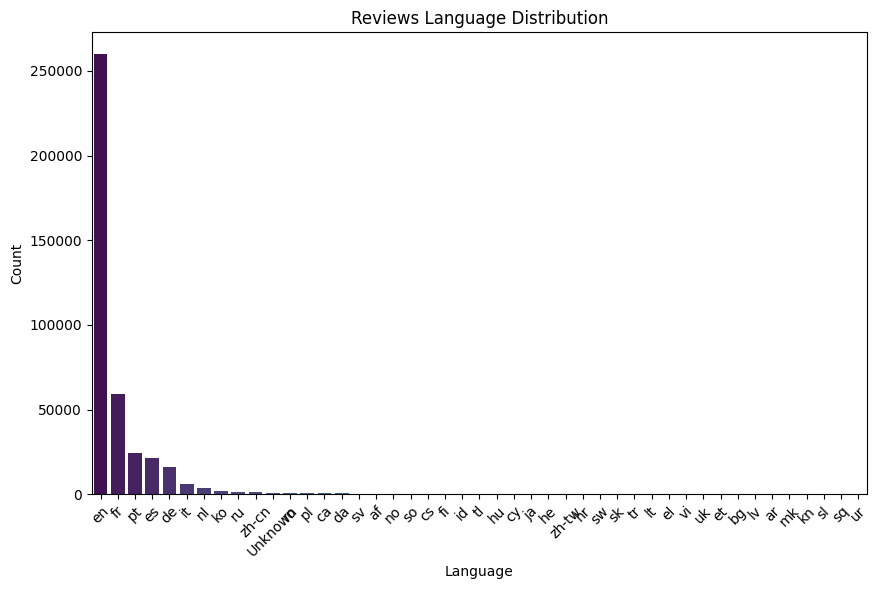

In [37]:
language_counts = (train_merged["language_reviews"].value_counts() + 
                   test_merged["language_reviews"].value_counts())

# Sort the language counts
language_counts = language_counts.sort_values(ascending=False)

# Plot the sorted language counts
plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")
plt.title("Reviews Language Distribution")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [30]:
train_merged["language_reviews"].unique()

array(['en', 'cy', 'de', 'fr', 'es', 'pt', 'ru', 'nl', 'it', 'ko',
       'zh-cn', 'he', 'Unknown', 'id', 'pl', 'no', 'so', 'da', 'sq', 'ro',
       'ca', 'hr', 'ja', 'zh-tw', 'tl', 'cs', 'ar', 'af', 'sk', 'sv',
       'lv', 'hu', 'el', 'sl', 'fi', 'et', 'sw', 'vi', 'uk', 'lt', 'tr',
       'mk', 'bg', 'ur'], dtype=object)

C:\Users\TCastilho\AppData\Local\Temp\ipykernel_11020\2641199386.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")


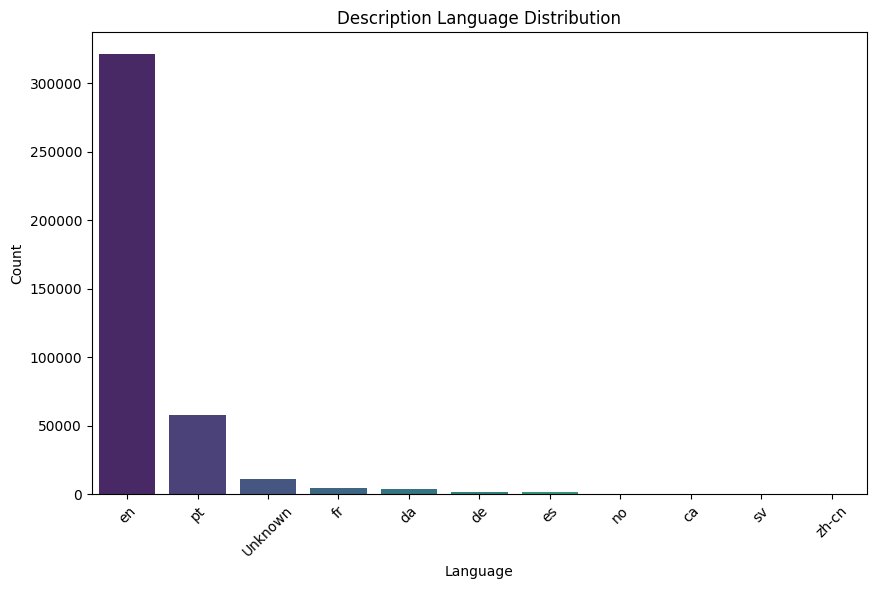

In [38]:
language_counts = (train_merged["language_description"].value_counts() + 
                   test_merged["language_description"].value_counts())

# Sort the language counts
language_counts = language_counts.sort_values(ascending=False)

# Plot the sorted language counts
plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")
plt.title("Description Language Distribution")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [32]:
train_merged["language_description"].unique()

array(['pt', 'en', 'es', 'fr', 'de', 'da', 'no', 'Unknown', 'sv', 'ca',
       'zh-cn'], dtype=object)

**Listed vs Unlisted**

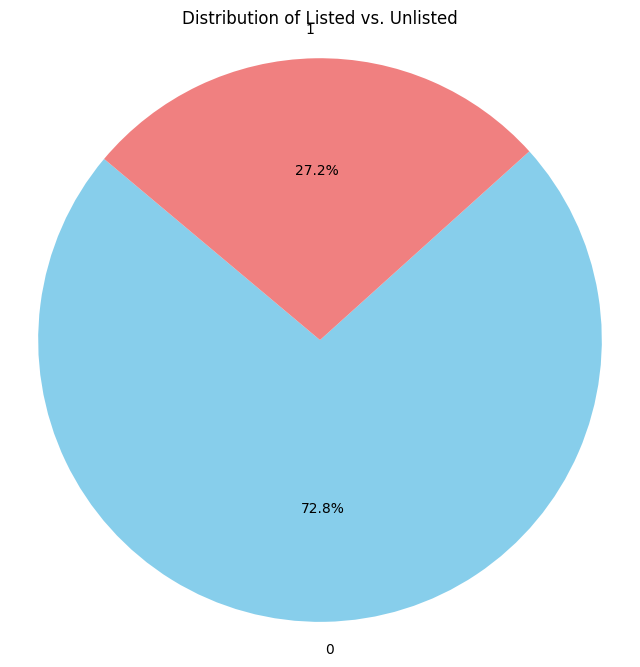

In [33]:
unlisted_counts = train['unlisted'].value_counts()

# Plotting the pie chart for the 'unlisted' column
plt.figure(figsize=(8, 8))
plt.pie(unlisted_counts, labels=unlisted_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Listed vs. Unlisted')
plt.axis('equal')  
plt.show()

**Word count**

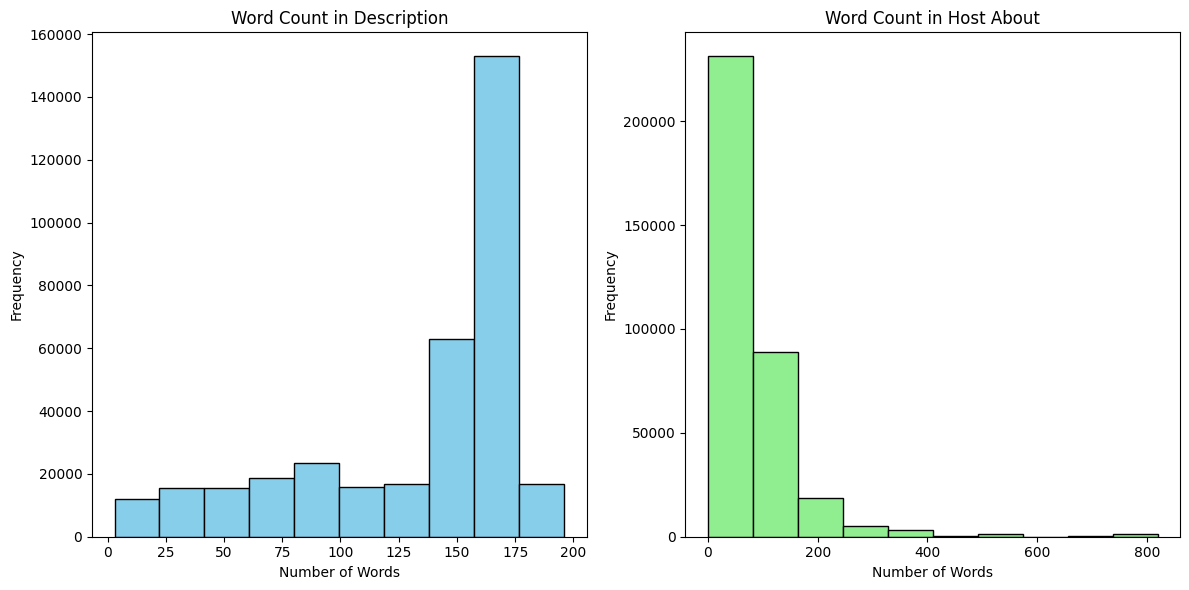

In [34]:
def count_words(text):
    if isinstance(text, str):
        return len(text.split())
    else:
        return np.nan  # or any other appropriate value for missing data

# Apply word count function to each column
train_merged['description_word_count'] = train_merged['description'].apply(count_words)
train_merged['host_about_word_count'] = train_merged['host_about'].apply(count_words)

# Plot histograms
plt.figure(figsize=(12, 6))

# Histogram for description word count
plt.subplot(1, 2, 1)
plt.hist(train_merged['description_word_count'], bins=10, color='skyblue', edgecolor='black')
plt.title('Word Count in Description')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# Histogram for host_about word count
plt.subplot(1, 2, 2)
plt.hist(train_merged['host_about_word_count'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Word Count in Host About')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Word Frequencies**

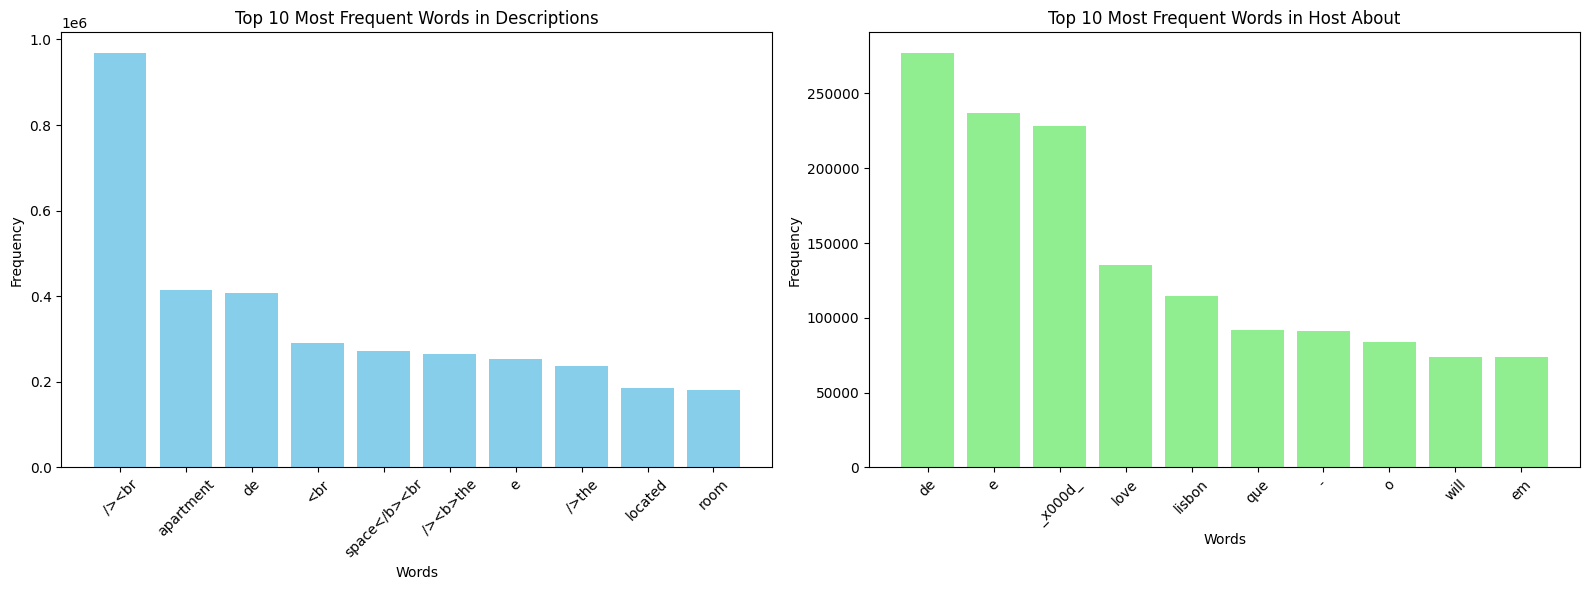

In [35]:
def count_word_frequencies(text_column, num_words=10):
    # Convert non-string values to strings
    text_column = [str(item) for item in text_column]
    
    # Join all text from the specified column into a single string
    all_text = ' '.join(text_column)

    # Convert text to lowercase and split into words
    words = all_text.lower().split()

    # Filter out common stop words (assuming STOPWORDS is defined somewhere)
    words = [word for word in words if word not in STOPWORDS]

    # Count word frequencies
    word_counts = Counter(words)

    # Get the most common words and their frequencies
    top_words = word_counts.most_common(num_words)

    return dict(top_words)
    
# Count word frequencies from the 'description' and 'host_about' columns
top_words_description = count_word_frequencies(train_merged['description'])
top_words_host_about = count_word_frequencies(train_merged['host_about'])

# Plotting the histograms of most frequent words for both columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for 'description' column
axes[0].bar(top_words_description.keys(), top_words_description.values(), color='skyblue')
axes[0].set_title('Top 10 Most Frequent Words in Descriptions')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Plot for 'host_about' column
axes[1].bar(top_words_host_about.keys(), top_words_host_about.values(), color='lightgreen')
axes[1].set_title('Top 10 Most Frequent Words in Host About')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout and display plots
plt.tight_layout()
plt.show()


**Word Cloud**

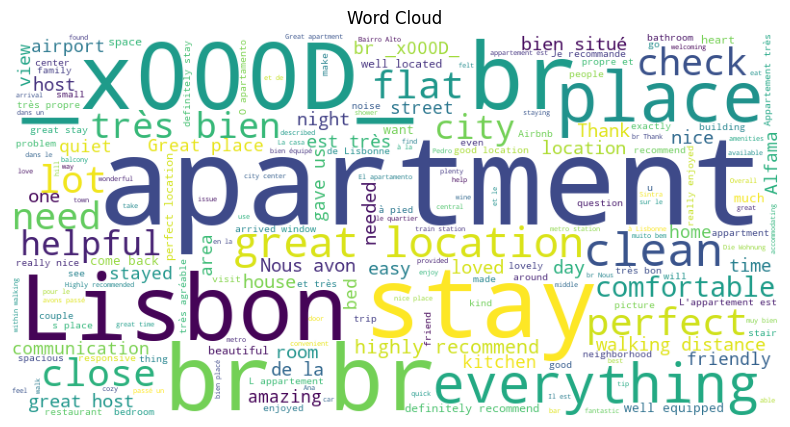

In [36]:
# Joining all the reviews into a single string
all_reviews = ' '.join(train_merged['comments'])
    
# Create WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_reviews)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Word Cloud')
plt.show()


## 3. Pre-Process

### 3.1 Emoji Treatment

The demojize() function takes a string as input and returns the string with the Unicode characters replaced by their corresponding emoji names. For example, if you pass the string “😀” to the demojize() function, it will return the string “smiley face”. https://codeforgeek.com/python-emoji-module/ emoji for python By default, the language is English (language='en') but also supported languages are:

Spanish ('es')

Portuguese ('pt')

Italian ('it')

French ('fr')

German ('de')

Farsi/Persian ('fa')

Indonesian ('id')

Simplified Chinese ('zh')

Japanese ('ja')

Korean ('ko')

Russian ('ru')

Arabic ('ar')

Turkish ('tr')

In [76]:
# Function to check for emojis
def has_emojis(text):
    if pd.isnull(text):
        return False
    return emoji.emoji_count(str(text)) > 0

# Function to convert emojis to text
def convert_emojis_to_text(dataframe, column_text, column_language):
    dataframe_copy = dataframe.copy()

    def convert_text(text, language):
        if has_emojis(text):
            try:
                return emoji.demojize(text, language=language)
            except:
                return emoji.demojize(text, language='en')
        else:
            return text

    # Apply the conversion to each row
    dataframe_copy[column_text] = dataframe_copy.apply(
        lambda row: convert_text(row[column_text], row[column_language]), axis=1
    )
    
    return dataframe_copy

In [77]:
train_merged_demojized = convert_emojis_to_text(train_merged, 'comments', 'language_reviews')

In [78]:
train_merged_demojized = convert_emojis_to_text(train_merged_demojized, 'description', 'language_description')

In [79]:
test_merged_demojized = convert_emojis_to_text(test_merged, 'comments', 'language_reviews')

In [80]:
test_merged_demojized = convert_emojis_to_text(test_merged_demojized, 'description', 'language_description')

**Checking if there still are emojis**

In [81]:
def print_comments_with_emojis(dataframe, column_text):
    with_emojis = dataframe[dataframe[column_text].apply(has_emojis)]
    print("Comments with emojis after processing:")
    for index, row in with_emojis.iterrows():
        print(f"Index {index}: {row[column_text]}")

In [82]:
print_comments_with_emojis(train_merged_demojized, 'comments')

Comments with emojis after processing:
Index 432: 👍
Index 822: 👍
Index 1033: Wspaniałe miejsce! <br/><br/>Gospodarz, który nas obsługiwał był niezwykle uprzejmy i pomocny. Gdy potrzebowaliśmy pomocy w nocy od razu się z nami skontaktował i pomógł nam natychmiast. Mieszkanie jest nowe, czyste, schludne, a okolica urokliwa i autentyczna. Do Lizbony centralnej jest dosłownie 30 minut spacerem. Jeśli planujesz urlop w Lizbonie, koniecznie rozważ tę ofertę, bo odpoczniesz i poczujesz się zaopiekowany. <br/><br/>Dziękujemy jeszcze raz za gościnę! 🥰
Index 2370: Good👌
Index 3117: Amazing 10/10😇
Index 5268: ♥️
Index 6047: 💚
Index 6130: 👍
Index 7052: Bardzo komfortowe mieszkanie . Ładne pokoje , komfortowe łazienki . Zlokalizowane  w cichej okolicy , blisko sklepiki lokalne .<br/>Bezproblemowe zameldowanie.  Do  centrum  kilka kroków, kilka schodków i jesteś na placu Rossio i na placu Martim Monitz  z którego rusza  słynny tramwaj 28!! Niedaleko Elevador da Lavra który  pomoże  zmęczonym dostać 

In [83]:
print_comments_with_emojis(test_merged_demojized, 'description')

Comments with emojis after processing:


In [84]:
print_comments_with_emojis(train_merged_demojized, 'comments')

Comments with emojis after processing:
Index 432: 👍
Index 822: 👍
Index 1033: Wspaniałe miejsce! <br/><br/>Gospodarz, który nas obsługiwał był niezwykle uprzejmy i pomocny. Gdy potrzebowaliśmy pomocy w nocy od razu się z nami skontaktował i pomógł nam natychmiast. Mieszkanie jest nowe, czyste, schludne, a okolica urokliwa i autentyczna. Do Lizbony centralnej jest dosłownie 30 minut spacerem. Jeśli planujesz urlop w Lizbonie, koniecznie rozważ tę ofertę, bo odpoczniesz i poczujesz się zaopiekowany. <br/><br/>Dziękujemy jeszcze raz za gościnę! 🥰
Index 2370: Good👌
Index 3117: Amazing 10/10😇
Index 5268: ♥️
Index 6047: 💚
Index 6130: 👍
Index 7052: Bardzo komfortowe mieszkanie . Ładne pokoje , komfortowe łazienki . Zlokalizowane  w cichej okolicy , blisko sklepiki lokalne .<br/>Bezproblemowe zameldowanie.  Do  centrum  kilka kroków, kilka schodków i jesteś na placu Rossio i na placu Martim Monitz  z którego rusza  słynny tramwaj 28!! Niedaleko Elevador da Lavra który  pomoże  zmęczonym dostać 

In [85]:
print_comments_with_emojis(test_merged_demojized, 'description')

Comments with emojis after processing:


We still have a very small percentage of emojis remaining after running the conversion function, it might be due to several factors such as unsupported emojis, non-standard emoji representations, or limitations in the emoji library. In our to prevent data leakage our decisions will be based on training data, and the test data is processed using the same rules established from the training data.

Based on the training set, we created a dictionary mapping emojis to their textual representations. Any emoji not found in the custom dictionary will be replaced with a generic placeholder :emoji:

textual representations can be found here: https://www.w3schools.com/charsets/ref_emoji_smileys.asp

https://www.geeksforgeeks.org/convert-emoji-into-text-in-python/

In [96]:
remaining_emoji_dict = {
    '💥': ':collision:',
    '🤭': ':face_with_hand_over_mouth:',
    '☺️': ':white_smiling_face:',
    '🤩': ':star-struck:',
    '💪🏽': ':flexed_biceps_dark_skin_tone:',
    '👍': ':thumbs_up:',
    '👍': ':thumbs_up:🏼',
    '⭐': ':star:',
    '😊': ':smiling_face_with_smiling_eyes:',
    '👌': ':ok_hand:',
    '👌': ':ok_hand:🏻',
    '👌🏼': ':ok_hand::light_skin_tone:',
    '👍🏻': ':thumbs_up_light_skin_tone:',
    '👍🏽': ':thumbs_up_medium-dark_skin_tone:',
    '😘': ':face_blowing_a_kiss:',
    '🤗': ':hugging_face:',
    '😉': ':winking_face:',
    '🌟': ':glowing_star:',
    '🙂': ':slightly_smiling_face:',
    '😱': ':face_screaming_in_fear:',
    '😃': ':grinning_face_with_big_eyes:',
    '❤️': ':heart:',
    '🥰': ':smiling_face_with_hearts:',
    '😇':'smiling_face_with_halo:',
    '🤙🏼': ":call_me_hand_medium-light_skin_tone:",
    '🤙': ":call_me_hand:",
    '👏': ':clapping_hands:',
    '👏🏼': ':clapping_hands::light_skin_tone:',
    '💚': ':green_heart:',
    '🙂': ':slightly_smiling_face:',
    '🔝': ':top_arrow:',
    '👌🏽': ':ok_hand::medium_skin_tone:',
    '😁': ':beaming_face_with_smiling_eyes:',
    '😂': ':face_with_tears_of_joy:',
    '🇵🇹': ':flag_Portugal:',
    '😍': ':smiling_face_with_heart-eyes:',
    '✨': ':sparkles:',
    '🙏🏻': ':folded_hands::light_skin_tone:',
    '⭐': ':star:',
    '😏': ':smirking_face:',
    '😋': ':face_savoring_food:',
    '🐝': ':honeybee:',
    '😎': ':smiling_face_with_sunglasses:',
    '💯': ':hundred_points:',
    '🎇': ':sparkler:',
    '🖤': ':black_heart:',
    '😌': ':relieved_face:',
    '🐈': ':cat:',
    '🎈': ':balons:',
    '💕': ':two_hearts:',
    '🚀': ':rocket:',
    '🌞': ':sun_with_face:',
    '🍋': ':lemon:',
    '😜':':stuck_out_tongue_winking_eye:',
    '🪨': ':rock:',
    '✌️': ':victory_hand:',
    '🔑': ':key:',
    '😃': ':grinning_face_with_big_eyes:',
    '😀':':grinning_face:',
    '✔️':':check_mark:',
    '🉐':':Japanese_acceptable_button:',
    '🤪':':zany_face:',
    '😆': ':grinning_squinting_face:',
    '🌅': ':sunrise:',
    '🌸': ':cherry_blossom:',
    '🦫': ':beaver:',
    '🎷': ':saxophone:',
    '🔥':':fire:',
    '🐐':':goat:',
    '🤝':':handshake:',
    '☹️':':frowning_face:',
    '☀️':':sun:',
    '🌱': ':seedling:',
    '✅': ':white_heavy_check_mark:',
    '🌹': ':rose:',
    '🙈': ':see-no-evil_monkey:',
    '💗': ':growing_heart:',
    '🏖️': ':beach:',
    '👌🏾': ':ok_hand::medium-dark_skin_tone:',
    '♥️': ':heart_suit:',
    '❤️': ':red_heart:',
    '🙌🏻':':raising_hands::light_skin_tone:',
    '🙌🏾':':raising_hands::medium-dark_skin_tone:',
    '☔':':umbrella_with_rain_drops:',
    '🇧🇪':':flag_Belgium:',
    '👎🏽':':thumbs_down::medium_skin_tone:',
    '👍🏼':':thumbs_up::medium-light_skin_tone:',
    '🤨':':face_with_raised_eyebrow:',
    '😭':':loudly_crying_face:',
    '👍🏾':':thumbs_up::medium-dark_skin_tone:',
    '🤟🏻':':love-you_gesture::light_skin_tone:',
    '🙁':':slightly_frowning_face:',
    '🤣':':rolling_on_the_floor_laughing:',
    '👌🏿':':ok_hand::dark_skin_tone:',
    '🇩🇰':':flag_Denmark:',
    '❣️':':heavy_heart_exclamation_mark_ornament:',
    '☝': ':index_pointing_up:',
    '🌊': ':water_wave:',
    '😕': ':confused_face:',
    '😒': ':unamused_face:',
    '🏴‍☠️': ':pirate_flag:'
}

In [97]:
def process_remaining_emojis(dataframe, column_text, emoji_dict):
    dataframe_copy = dataframe.copy()
    
    # Convert the column to strings
    dataframe_copy[column_text] = dataframe_copy[column_text].astype(str)
    
    def has_emojis(text):
        return any(emoji.is_emoji(char) for char in text)
    
    def custom_replace_remaining_emojis(text, emoji_dict):
        # Replace known emojis with their corresponding values in emoji_dict
        for emoji_char, replacement in emoji_dict.items():
            text = text.replace(emoji_char, replacement)
        return text
    
    def replace_unknown_emojis(text):
        # Logic to replace unknown emojis (if any)
        return text
    
    def convert_text_with_remaining_dict(text):
        if has_emojis(text):
            text = custom_replace_remaining_emojis(text, emoji_dict)
            text = replace_unknown_emojis(text)
        return text

    dataframe_copy[column_text] = dataframe_copy[column_text].apply(convert_text_with_remaining_dict)
    return dataframe_copy

In [98]:
train_merged_demojized = process_remaining_emojis(train_merged_demojized, 'comments', remaining_emoji_dict)

In [99]:
train_merged_demojized = process_remaining_emojis(train_merged_demojized, 'description', remaining_emoji_dict)

In [100]:
test_merged_demojized = process_remaining_emojis(test_merged_demojized, 'comments', remaining_emoji_dict)

In [101]:
test_merged_demojized = process_remaining_emojis(test_merged_demojized, 'description', remaining_emoji_dict)

In [102]:
def print_comments_with_emojis(dataframe, column_text):
    with_emojis = dataframe[dataframe[column_text].apply(has_emojis)]
    print("Comments with emojis after processing:")
    for index, row in with_emojis.iterrows():
        print(f"Index {index}: {row[column_text]}")

print_comments_with_emojis(train_merged_demojized, 'comments')
print_comments_with_emojis(train_merged_demojized, 'description')
print_comments_with_emojis(test_merged_demojized, 'comments')
print_comments_with_emojis(test_merged_demojized, 'description')

Comments with emojis after processing:
Comments with emojis after processing:
Comments with emojis after processing:
Index 109: Communicatie was super ! We kregen altijd onmiddellijk antwoord op onze vragen en Maria stuurde ons een lange lijst met veel informatie en leuke dingen om te doen in de stad ! Toen we vertrokken heeft ze ook de taxi geregeld die ons voor de deur heeft opgepikt :ok_hand:🏻 het appartement is ideaal gelegen , rustige buurt maar vlak bij veel leuke restaurantjes en cafés. Het appartement heeft veel charme maar voelt een beetje verouderd aan. De keuken is oud en ruikt wat muf. Badkamer en slaapkamers waren wel proper ! De koer was ideaal maar ook een beetje verwilderd. Al bij al hebben we enorm genoten van ons verblijf !
Index 31844: :ok_hand:🏼
Index 36276: :thumbs_up:🏼
Comments with emojis after processing:


We thought this was a weird bug, since it only happens in 3 comments, we deleted them.

In [103]:
indices_to_drop = [109, 31844, 36276]
test_merged_demojized = test_merged_demojized.drop(indices_to_drop)

In [104]:
print_comments_with_emojis(test_merged_demojized, 'comments')

Comments with emojis after processing:


### 3.2 Language Problem

In [111]:
language_counts = (train_merged_demojized["language_description"].value_counts())


total_entries = len(train_merged_demojized)
language_percentages = (language_counts / total_entries) * 100

print("\nLanguage description Percentages:")
print(language_percentages)


Language description Percentages:
language_description
en         79.001875
pt         14.840075
Unknown     3.098547
fr          1.251326
da          0.782252
de          0.444707
es          0.328407
zh-cn       0.155066
ca          0.054273
no          0.035721
sv          0.007753
Name: count, dtype: float64


In [110]:
language_counts = (train_merged_demojized["language_reviews"].value_counts())


total_entries = len(train_merged_demojized)
language_percentages = (language_counts / total_entries) * 100

print("\nLanguage description Percentages:")
print(language_percentages)


Language description Percentages:
language_reviews
en         64.308282
fr         14.752850
pt          6.212324
es          5.327341
de          3.933687
it          1.572810
nl          0.989652
ru          0.415078
ko          0.408709
zh-cn       0.285487
Unknown     0.241460
ro          0.224292
pl          0.164204
ca          0.158112
da          0.128483
sv          0.103008
af          0.096639
no          0.083625
so          0.074210
cs          0.060088
fi          0.055381
id          0.044858
tl          0.042920
hu          0.038213
cy          0.031013
ja          0.030182
he          0.024644
zh-tw       0.024367
hr          0.022706
sw          0.020491
sk          0.019660
tr          0.017999
lt          0.015230
vi          0.013845
el          0.013568
uk          0.012738
sl          0.010522
et          0.006646
bg          0.004984
lv          0.004154
ar          0.002492
sq          0.002215
mk          0.000554
ur          0.000277
Name: count, dtype: floa

### 3.3 Cleaning Data

In [ ]:
stop = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
lemma = WordNetLemmatizer()

def clean_text(text, lemmatize=True, stemmer=True):
    # Lowercase text
    text = text.lower()
    
    # Remove unnecessary tags and all non-alphabetic characters
    text = re.sub("<br />", "", text)
    text = re.sub("[^a-zA-Z]"," ", text)
    
    # Remove stopwords
    text = " ".join([word for word in text.split() if word not in stop])
    
    # Lemmatize
    if lemmatize:
        text = " ".join(lemma.lemmatize(word) for word in text.split())
    
    # Stemming
    if stemmer:
        text = " ".join(stemmer.stem(word) for word in text.split())
        
    return text

# Apply cleaning function to each row of the 'comments' column
def clean_comments(df):
    tqdm.pandas()  # Enable progress_apply method
    df['clean_comments'] = df['comments'].progress_apply(lambda x: clean_text(x))
    return df

### 3.4 Removing Unnecessary Data

### 3.5 Re - Visualizations

### 3.6 Train / Validation / Test Split

## 4. Feature Engineering

 For predicting whether an Airbnb listing is unlisted (0) or not (1), missing comments might indeed carry valuable information. The absence of comments could be an important feature in itself, potentially indicating something about the listing's status. Removing could lose some valuable info for predicting. 
 Different approaches : 
 

- Create a binary feature indicating whether a comment is missing (NaN) or not. This helps the model understand that the absence of a comment itself might be significant.
Fill Missing Comments with a Placeholder:

- Replace NaN values in the comments column with a placeholder text (e.g., "no_comment"). This ensures that all entries are treated as valid strings.

- both

In [ ]:
merged_data['comments'].fillna('no_review', inplace=True)
test_merged_data['comments'].fillna('no_review', inplace=True)


In [ ]:
merged_data.isna().sum()

In [ ]:
test_merged_data.isna().sum()

In [ ]:
merged_data['comment_language'].fillna('None', inplace=True)
test_merged_data['comment_language'].fillna('None', inplace=True)
